# Mạng nơ ron đơn tầng, 2 lớp (Tensorflow): thực hành 1, 2, 3 slides 3

* Họ tên: Kim Minh Thắng
* Mã số sinh viên: B2007210

## Thực hành 1

### 1.1 Import tensorflow

In [29]:
import tensorflow as tf 

### 1.2 Đồ thị tính toán

```mermaid
flowchart BT
    X((X)) --> matmul((matmul))
    W((W)) --> matmul
    matmul --> +((+))
    b((b)) --> +
    + --> sigmoid((sigmoid))
    sigmoid --> y((y_hat))
```

In [30]:
@tf.function
def predict(X, W, b):
    return tf.sigmoid(tf.matmul(X, W) + b)

### 1.3 Hàm lỗi

```mermaid
flowchart BT
    y_hat((y_hat)) --> sub
    y((y)) --> sub(("-"))
    sub --> square((^2))
    square --> reduce_mean((reduce_mean))
    reduce_mean --> L((L))
```

In [31]:
@tf.function
def loss(y, y_hat):
    return tf.reduce_mean((y - y_hat)**2)

### 1.4 Tính đạo hàm riêng tự động với `GradientTape`

In [32]:
X = tf.constant([[0.0, 0], [0, 1], [1, 0], [1, 1]])
y = tf.constant([[0.0], [0], [0], [1]])
W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal(()))

alpha = 0.1

In [33]:
loss_his = []

for it in range(500):
    with tf.GradientTape() as tape:
        current_loss = loss(y, predict(X, W, b))
    
    loss_his.append(current_loss)
    
    dW, db = tape.gradient(current_loss, [W, b])
    W.assign_sub(alpha * dW)
    b.assign_sub(alpha * db)

### 1.5 Dự đoán

In [34]:
y_hat = predict(X, W, b)
y_hat

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.10605552],
       [0.3184376 ],
       [0.28128472],
       [0.6064996 ]], dtype=float32)>

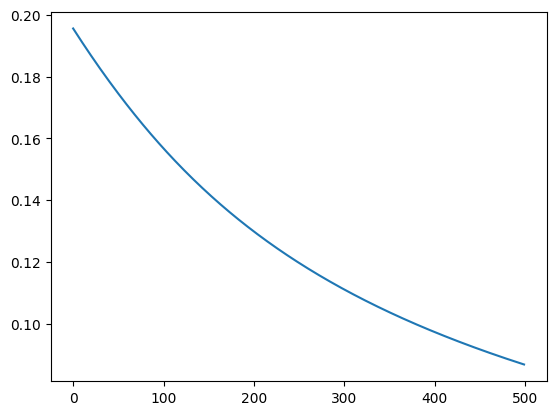

In [35]:
import matplotlib.pyplot as plt

plt.plot(loss_his)

## Thực hành 2

- Làm lại bài thực hành 1 với hàm lỗi `binary crossentropy` được định nghĩa như sau:

    $
\begin{aligned}
\text{L}(y, \hat{y}) = -\frac{1}{m}\sum_{i=1}^{m}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{aligned}
    $


### 2.1 Import tensorflow

In [36]:
import tensorflow as tf

### 2.2 Đồ thị tính toán

```mermaid
flowchart BT
    X((X)) --> matmul((matmul))
    W((W)) --> matmul
    matmul --> +((+))
    b((b)) --> +
    + --> sigmoid((sigmoid))
    sigmoid --> y((y_hat))
```

In [37]:
@tf.function
def predict(X, W, b):
    return tf.sigmoid(tf.matmul(X, W) + b)

### 2.3 Hàm lỗi

$
\begin{aligned}
\text{L}(y, \hat{y}) = -\frac{1}{m}\sum_{i=1}^{m}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{aligned}
$

In [38]:
@tf.function
def loss(y, y_hat):
    return - tf.reduce_sum(y * tf.math.log(y_hat) + (1 - y) * tf.math.log(1 - y_hat))

### 2.4 Tính đạo hàm riêng tự động với `GradientTape`

In [39]:
X = tf.constant([[0.0, 0], [0, 1], [1, 0], [1, 1]])
y = tf.constant([[0.0], [0], [0], [1]])
W = tf.Variable(tf.random.normal((2, 1)))
b = tf.Variable(tf.random.normal(()))

alpha = 0.1

In [40]:
loss_his = []
for it in range(500):
    with tf.GradientTape() as tape:
        current_loss = loss(y, predict(X, W, b))
    
    loss_his.append(current_loss)
    
    dW, db = tape.gradient(current_loss, [W, b])
    W.assign_sub(alpha * dW)
    b.assign_sub(alpha * db)

### 2.5 Dự đoán

In [41]:
y_hat = predict(X, W, b)
y_hat

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.00152724],
       [0.09204122],
       [0.09198414],
       [0.8703615 ]], dtype=float32)>

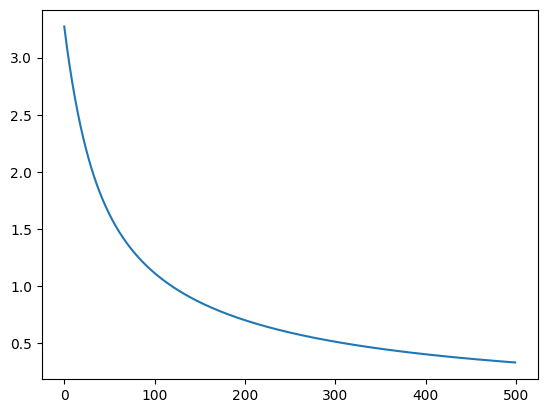

In [42]:
import matplotlib.pyplot as plt

plt.plot(loss_his)

## Thực hành 3

Làm lại bài phân loại hoa iris (2 lớp) với tensorflow thay vì dùng keras
- Sử dụng hàm lỗi `binary crossentropy`
- Cần phân ngưỡng kết quả đầu ra để có nhãn chính xác
- Tính độ chính xác phân lớp bằng cách so sánh nhãn dự báo và nhãn mong muốn

Có thể dùng hàm `Tensor.numpy()` để lấy giá trị của tensor về dạng numpy để hậu xử lý.

### Import các thư viện cần thiết

In [43]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

### 3.1 Đọc và dữ liệu

In [44]:
df = pd.read_csv('./Iris.csv')
df = df.head(100)

In [45]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
le = LabelEncoder()

y = df['Species'].values

le.fit(y)

y = le.transform(y)

pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

### 3.2 Định nghĩa hàm dự đoán

In [49]:
@tf.function
def predict(X, W, b):
    return tf.sigmoid(tf.matmul(X, W) + b)

### 3.3 Định nghĩa hàm lỗi (binary crossentropy)

In [50]:
@tf.function
def loss(y, y_hat):
    return - tf.reduce_mean(y * tf.math.log(y_hat) + (1 - y) * tf.math.log(1 - y_hat))

### 3.4 Train model

In [51]:
W = tf.Variable(tf.random.normal((4, 1)))
b = tf.Variable(tf.random.normal(()))
alpha = 0.1

In [52]:
loss_his = []

for it in range(500):
    with tf.GradientTape() as tape:
        current_loss = loss(y_train, predict(x_train, W, b))
    
    loss_his.append(current_loss)
    
    dW, db = tape.gradient(current_loss, [W, b])
    
    W.assign_sub(alpha * dW)
    b.assign_sub(alpha * db)

### 3.5 Dự đoán

In [53]:
y_hat = predict(x_test, W, b)

y_hat = y_hat.numpy()

y_hat = [1 if i >= 0.5 else 0 for i in y_hat]

y_hat = tf.convert_to_tensor(y_hat, dtype=tf.float32)

print(f'Loss: {abs(y_hat - y_test).numpy().sum() / len(y_test) * 100}%')

Loss: 60.0%


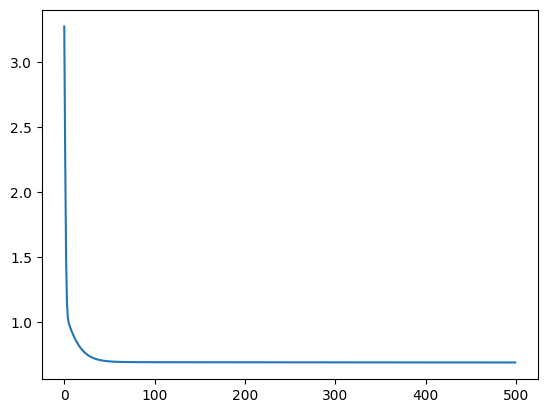

In [54]:
plt.plot(loss_his)